In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('loyalty_clean.csv')

In [3]:
from sklearn.model_selection import train_test_split

# Encode categorical variables using one-hot encoding
encoded_df = pd.get_dummies(df, columns=['region', 'loyalty_years', 'joining_month', 'promotion'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = encoded_df.drop('spend', axis=1)  # Features
y = encoded_df['spend']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (996, 20) (996,)
Testing set shape: (250, 20) (250,)


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

In [5]:
# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions on the testing data
predictions = linear_reg_model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 74.17871957493716
Root Mean Squared Error (RMSE): 8.612706866887851
R-squared: 0.17563230185198053


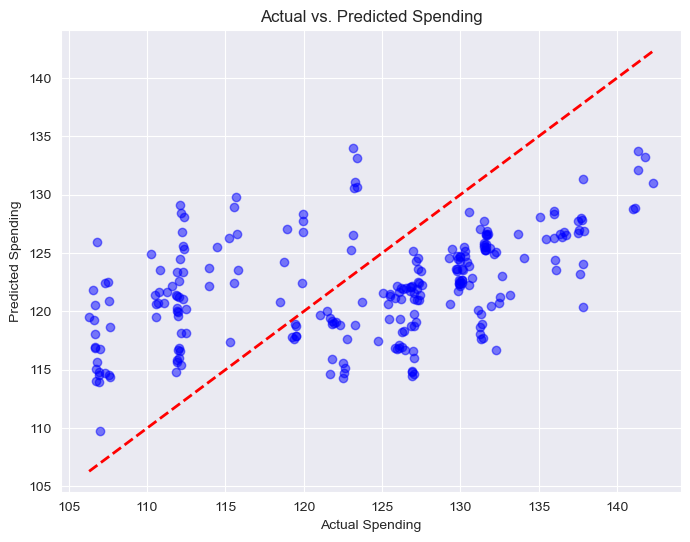

In [8]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Spending')
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for regularization
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create parameter grid for Ridge Regression
param_grid_ridge = {'alpha': alphas}

# Create parameter grid for Lasso Regression
param_grid_lasso = {'alpha': alphas}

# Initialize Ridge and Lasso Regression models
ridge_model = Ridge()
lasso_model = Lasso()

# Perform GridSearchCV for Ridge Regression
ridge_grid = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Perform GridSearchCV for Lasso Regression
lasso_grid = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Get best hyperparameters for Ridge and Lasso Regression
best_alpha_ridge = ridge_grid.best_params_['alpha']
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Fit models with best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_lasso_model = Lasso(alpha=best_alpha_lasso)
best_ridge_model.fit(X_train, y_train)
best_lasso_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = best_ridge_model.predict(X_test)
lasso_predictions = best_lasso_model.predict(X_test)

# Evaluate performance
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

# Print results
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)

Ridge Regression MSE: 74.26154802880235
Lasso Regression MSE: 75.14303920161741


In [11]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)